### Random Forest

C:\Users\Nethma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


🔹 Random Forest Performance:
Accuracy: 0.9014

Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.33      0.42        12
           0       0.80      0.50      0.62        16
           1       0.92      0.97      0.94       185

    accuracy                           0.90       213
   macro avg       0.76      0.60      0.66       213
weighted avg       0.89      0.90      0.89       213



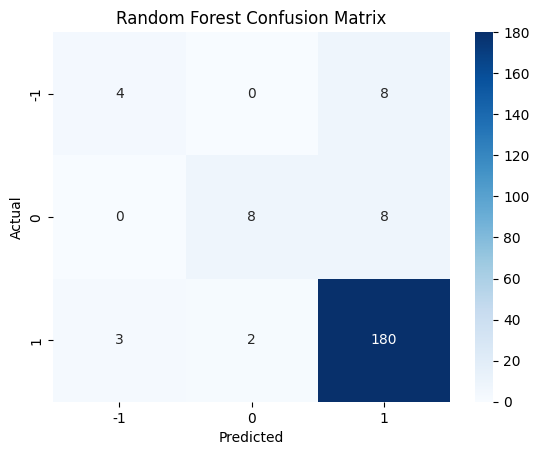

In [2]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
import pandas as pd
X_train = pd.read_csv('../Data/X_train_smote.csv')
y_train = pd.read_csv('../Data/y_train_smote.csv')
X_test = pd.read_csv('../Data/X_test.csv')
y_test = pd.read_csv('../Data/y_test.csv')

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("🔹 Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


Hyperparameter Tuning (Random Forest)

In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Performance metrics for the best model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("\n🔹 Random Forest (Tuned) Performance:")
print(f"Accuracy: {accuracy_best_rf:.4f}")

# Classification Report for the best model
print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\Nethma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9878358042014928

🔹 Random Forest (Tuned) Performance:
Accuracy: 0.9061

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

          -1       0.80      0.33      0.47        12
           0       0.86      0.38      0.52        16
           1       0.91      0.99      0.95       185

    accuracy                           0.91       213
   macro avg       0.86      0.57      0.65       213
weighted avg       0.90      0.91      0.89       213

